# Regresja liniowa

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

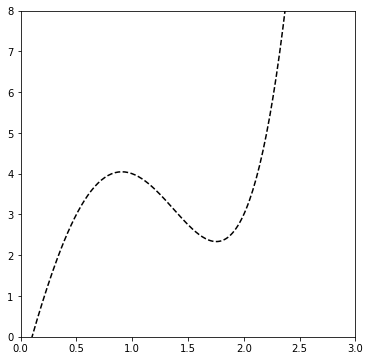

In [2]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)$.

Na ich podstawie będziemy wykonywać naszej presykcji.

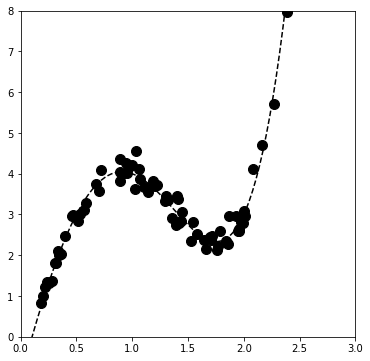

In [3]:
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.
My narazie urzyjemy metody opartej na rozwiązaniu układu równań liniowych.

In [4]:
M1 = np.vstack( (np.ones_like(x), x) ).T
p1 = np.linalg.lstsq(M1, y, rcond=None)

Definiujemy naszą funkcję regresji

In [5]:
f_lr_1 = lambda x: p1[0][1] * x +p1[0][0]

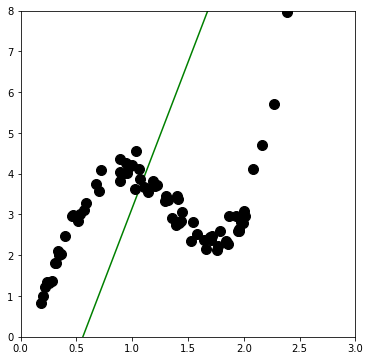

In [6]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr_1(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [7]:
M2 = np.vstack( (np.ones_like(x), x, x**2) ).T
p2 = np.linalg.lstsq(M2, y, rcond=None)

Definiujemy naszą funkcję regresji

In [8]:
f_lr_2 = lambda x: p2[0][2]*pow(x,2) + p2[0][1] * x + p2[0][0] 

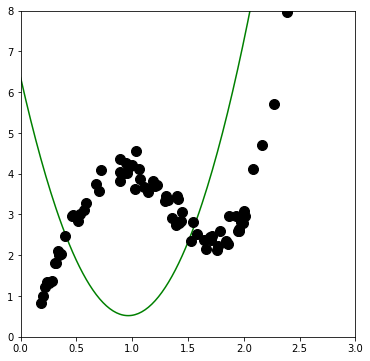

In [9]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr_2(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie 1
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

# Zadanie 2
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

# Zadanie 3
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + a_5 \cdot x^5 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

# Zadanie 4
Narysuj wszystkie wyniki na jednym wykresie.

## Która z krzywych jest najleprza?

# Zadanie 5
Musimy mieć jakąś miarę oceny.

In [11]:
import statsmodels.api as sm
Res1 = sm.OLS(y, M1).fit()
Res2 = sm.OLS(y, M2).fit()

In [12]:
print(Res1.summary2())
print(".....................................")
print(".....................................")
print(".....................................")
print(Res2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.482   
Dependent Variable: y                AIC:                611.1382
Date:               2017-05-07 09:56 BIC:                616.3485
No. Observations:   100              Log-Likelihood:     -303.57 
Df Model:           1                F-statistic:        93.14   
Df Residuals:       98               Prob (F-statistic): 6.93e-16
R-squared:          0.487            Scale:              25.886  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     -2.6934     1.0090   -2.6694   0.0089   -4.6958   -0.6911
x1         6.0015     0.6219    9.6510   0.0000    4.7675    7.2355
-----------------------------------------------------------------
Omnibus:              38.537       Durbin-Watson:          2.247 
Prob(Omnibus):   

# Zadanie 6
Analogiczne wyniki możemy izusklać za pomocą prostego kodu.

In [13]:
import statsmodels.formula.api as smf
# Turn the data into a pandas DataFrame, so that we
# can address them in the formulas with their name
df = pd.DataFrame({'x':x, 'y':y})

# Fit the models, and show the results
Res1F = smf.ols('y~x', df).fit()
Res2F = smf.ols('y ~ x+I(x**2)', df).fit()

In [14]:
print(Res1F.summary())
print(".....................................")
print(".....................................")
print(".....................................")
print(Res2F.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     93.14
Date:                Sun, 07 May 2017   Prob (F-statistic):           6.93e-16
Time:                        09:57:02   Log-Likelihood:                -303.57
No. Observations:                 100   AIC:                             611.1
Df Residuals:                      98   BIC:                             616.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.6934      1.009     -2.669      0.0